In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns

import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams["figure.figsize"] = (10, 6) 

In [17]:
# Loading the movies dataset into df1 and printing it to show the result.
df1 = pd.read_csv("movies.csv")
display(df1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [19]:
duplicateRowsDF = df1[df1.duplicated()] 
display(duplicateRowsDF)

,movieId,title,genres


In [20]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(df1.describe(include="all"))

,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,Saturn 3 (1980),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN


In [16]:
df2 = pd.read_csv("links.csv")
display(df2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [15]:
df3 = pd.read_csv("tags.csv")
display(df3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [18]:
df4 = pd.read_csv("ratings.csv")
display(df4)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [27]:
csv3 = pd.merge(df3, df4, on = ['userId', 'movieId'], how = 'inner')
display(csv3)

,userId,movieId,tag,timestamp_x,rating,timestamp_y
0,2,60756,funny,1445714994,5.0,1445714980
1,2,60756,Highly quotable,1445714996,5.0,1445714980
2,2,60756,will ferrell,1445714992,5.0,1445714980
3,2,89774,Boxing story,1445715207,5.0,1445715189
4,2,89774,MMA,1445715200,5.0,1445715189
...,...,...,...,...,...,...
3471,606,6107,World War II,1178473747,4.0,1171324428
3472,606,7382,for katie,1171234019,4.5,1171233924
3473,610,3265,gun fu,1493843984,5.0,1479542010
3474,610,3265,heroic bloodshed,1493843978,5.0,1479542010


In [30]:
test = pd.merge(df1, csv3, on = 'movieId', how = 'inner')
display(test)

,movieId,title,genres,userId,tag,timestamp_x,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,4.0,1122227329
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825,4.0,978575760
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013,3.5,1525286001
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929,4.0,1528843890
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932,4.0,1528843890
...,...,...,...,...,...,...,...,...
3471,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552,4.0,1528934550
3472,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582,3.5,1537098554
3473,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587,3.5,1537098554
3474,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603,3.5,1537098554


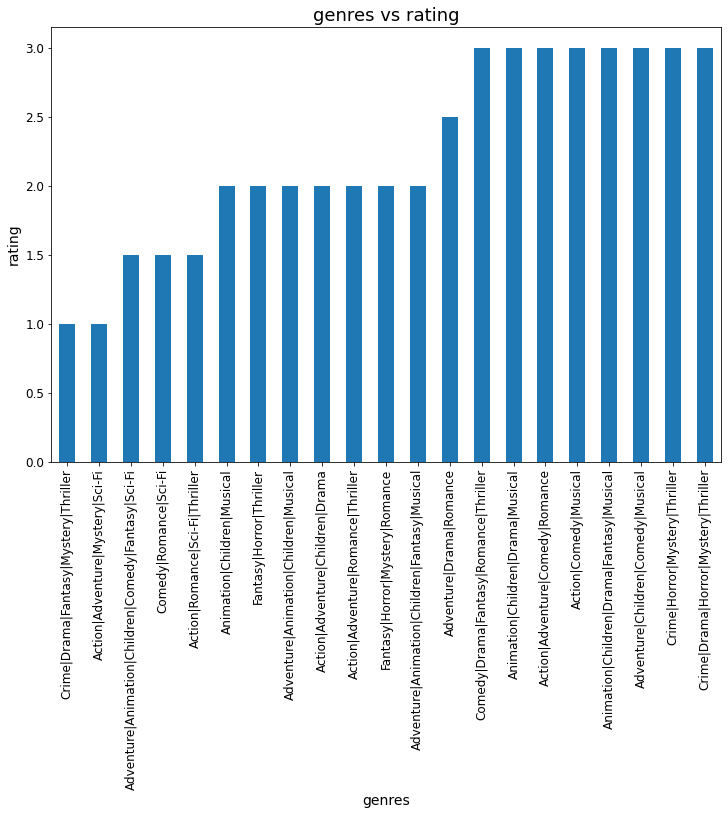

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
test.groupby(by="genres")["rating"].sum().sort_values()[1:22].plot(kind="bar", fontsize=12)
plt.title("genres vs rating", fontsize=18)
plt.xlabel("genres", fontsize=14)
plt.ylabel("rating", fontsize=14)
plt.show()

In [39]:
df5 = pd.read_csv("check.csv")
display(df5)

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,...,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link
0,Avatar,James Cameron,2009.0,0,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,...,33000,4834,7.9,886204,English,USA,Color,1.78,PG-13,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007.0,0,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,...,0,48350,7.1,471220,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Sam Mendes,2015.0,1,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,...,85000,11700,6.8,275868,English,UK,Color,2.35,PG-13,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Christopher Nolan,2012.0,0,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,...,164000,106759,8.5,1144337,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,NaN,0,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,...,0,143,7.1,8,NaN,NaN,Color,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Scott Smith,2013.0,2,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,Crystal Lowe,...,84,2283,7.7,629,English,Canada,Color,NaN,NaN,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,NaN,NaN,1,NaN,Natalie Zea,841.0,Valorie Curry,593.0,Sam Underwood,...,32000,1753,7.5,73839,English,USA,Color,16.00,TV-14,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Benjamin Roberds,2013.0,0,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,David Chandler,...,16,0,6.3,38,English,USA,Color,NaN,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Daniel Hsia,2012.0,5,0.0,Alan Ruck,946.0,Daniel Henney,719.0,Eliza Coupe,...,660,2386,6.3,1255,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


In [40]:
df5['genres']

0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
4                           Documentary
                     ...               
5038                       Comedy|Drama
5039       Crime|Drama|Mystery|Thriller
5040              Drama|Horror|Thriller
5041               Comedy|Drama|Romance
5042                        Documentary
Name: genres, Length: 5043, dtype: object

In [4]:
duplRow = df5[df5.duplicated()] 
display(duplRow)

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,...,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link
137,The Legend of Tarzan,David Yates,2016.0,2,282.0,Christoph Waltz,11000.0,Alexander Skarsgård,10000.0,Casper Crump,...,29000,21175,6.6,42372,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt0918940/?ref_=fn_t...
187,The Twilight Saga: Breaking Dawn - Part 2,Bill Condon,2012.0,3,386.0,Robert Pattinson,21000.0,Kristen Stewart,17000.0,Taylor Lautner,...,65000,59177,5.5,185394,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1673434/?ref_=fn_t...
204,Godzilla Resurgence,Hideaki Anno,2016.0,0,28.0,Mark Chinnery,544.0,Shin'ya Tsukamoto,106.0,Atsuko Maeda,...,0,699,8.2,374,Japanese,Japan,Color,2.35,NaN,http://www.imdb.com/title/tt4262980/?ref_=fn_t...
303,Pan,Joe Wright,2015.0,4,456.0,Hugh Jackman,20000.0,Cara Delevingne,548.0,Nonso Anozie,...,24000,21393,5.8,39956,English,USA,Color,2.35,PG,http://www.imdb.com/title/tt3332064/?ref_=fn_t...
389,Fantastic Four,Josh Trank,2015.0,3,128.0,Tim Blake Nelson,596.0,Reg E. Cathey,360.0,Tim Heidecker,...,41000,1261,4.3,110486,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1502712/?ref_=fn_t...
395,The Fast and the Furious,Rob Cohen,2001.0,2,357.0,Paul Walker,23000.0,Vin Diesel,14000.0,Jordana Brewster,...,14000,45327,6.7,272223,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt0232500/?ref_=fn_t...
590,Hercules,Brett Ratner,2014.0,0,420.0,Dwayne Johnson,12000.0,Rufus Sewell,3000.0,Ingrid Bolsø Berdal,...,21000,16235,6.0,115687,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1267297/?ref_=fn_t...
656,Total Recall,Paul Verhoeven,1990.0,0,719.0,Ronny Cox,605.0,Rachel Ticotin,308.0,Marshall Bell,...,0,1441,7.5,240241,English,USA,Color,1.85,R,http://www.imdb.com/title/tt0100802/?ref_=fn_t...
794,The Avengers,Joss Whedon,2012.0,3,0.0,Chris Hemsworth,26000.0,Robert Downey Jr.,21000.0,Scarlett Johansson,...,123000,87697,8.1,995415,English,USA,Color,1.85,PG-13,http://www.imdb.com/title/tt0848228/?ref_=fn_t...
1220,Unbroken,Angelina Jolie Pitt,2014.0,0,11000.0,Finn Wittrock,769.0,Jack O'Connell,698.0,Alex Russell,...,35000,2938,7.2,103589,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1809398/?ref_=fn_t...


In [5]:
df5 = df5.drop_duplicates(subset=None, keep="first", inplace=False)
df5 = df5.reset_index(drop=True)

with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(df5.describe(include="all"))

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,duration,genres,plot_keywords,budget,gross,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link
count,4998,4895,4891.000000,4998.000000,4895.000000,4991,4991.000000,4985,4985.000000,4975,4975.000000,4983.000000,4998,4846,4.511000e+03,4.124000e+03,4949.000000,4977.000000,4998.000000,4998.000000,4998.000000,4.998000e+03,4996,4996,4998,4671.000000,4697,4998
unique,4917,2398,NaN,NaN,NaN,2097,NaN,3032,NaN,3521,NaN,NaN,914,4760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,65,2,NaN,18,4919
top,King Kong,Steven Spielberg,NaN,NaN,NaN,Robert De Niro,NaN,Morgan Freeman,NaN,Ben Mendelsohn,NaN,NaN,Drama,based on novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,USA,Color,NaN,R,http://www.imdb.com/title/tt2638144/?ref_=fn_t...
freq,3,26,NaN,NaN,NaN,49,NaN,20,NaN,8,NaN,NaN,235,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4672,3776,4791,NaN,2098,3
mean,NaN,NaN,2002.468820,1.373749,688.679060,NaN,6556.939892,NaN,1642.998796,NaN,639.900905,107.213325,NaN,NaN,3.325764e+07,4.832565e+07,139.890079,272.014667,7487.430172,9676.941176,6.441056,8.347020e+04,NaN,NaN,NaN,2.221417,NaN,NaN
std,NaN,NaN,12.475235,2.018616,2821.649616,NaN,15061.586700,NaN,4030.925303,NaN,1643.298282,25.248775,NaN,NaN,4.138978e+07,6.796483e+07,121.477586,377.776210,19290.726563,18165.404578,1.124107,1.380866e+05,NaN,NaN,NaN,1.391185,NaN,NaN
min,NaN,NaN,1916.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,7.000000,NaN,NaN,2.180000e+02,1.620000e+02,1.000000,1.000000,0.000000,0.000000,1.600000,5.000000e+00,NaN,NaN,NaN,1.180000,NaN,NaN
25%,NaN,NaN,1999.000000,0.000000,7.000000,NaN,611.500000,NaN,280.000000,NaN,133.000000,93.000000,NaN,NaN,6.000000e+06,5.304835e+06,50.000000,64.000000,0.000000,1405.500000,5.800000,8.560000e+03,NaN,NaN,NaN,1.850000,NaN,NaN
50%,NaN,NaN,2005.000000,1.000000,49.000000,NaN,984.000000,NaN,595.000000,NaN,369.000000,103.000000,NaN,NaN,2.000000e+07,2.544575e+07,110.000000,156.000000,162.500000,3085.500000,6.600000,3.426050e+04,NaN,NaN,NaN,2.350000,NaN,NaN
75%,NaN,NaN,2011.000000,2.000000,192.000000,NaN,11000.000000,NaN,917.000000,NaN,635.000000,118.000000,NaN,NaN,4.300000e+07,6.231942e+07,195.000000,324.000000,3000.000000,13740.500000,7.200000,9.612075e+04,NaN,NaN,NaN,2.350000,NaN,NaN


In [89]:
df5["director_name"] = df5["director_name"].fillna("None")
df5["director_facebook_likes"] = df5["director_facebook_likes"].fillna(0.0).astype(np.float)
df5["actor_1_name"] = df5["actor_1_name"].fillna("None")
df5["actor_1_facebook_likes"] = df5["actor_1_facebook_likes"].fillna(0.0).astype(np.float)
df5["actor_2_name"] = df5["actor_2_name"].fillna("None")
df5["actor_2_facebook_likes"] = df5["actor_2_facebook_likes"].fillna(0.0).astype(np.float)
df5["actor_3_name"]=df5["actor_3_name"].fillna("None")
df5["actor_3_facebook_likes"] = df5["actor_3_facebook_likes"].fillna(0.0).astype(np.float)
df5["plot_keywords"] = df5["plot_keywords"].fillna("None")
df5["budget"] = df5["budget"].fillna(df5["budget"].mean()).astype(np.int)
df5["gross"] = df5["gross"].fillna(0.0).astype(np.float)
df5["num_critic_for_reviews"] = df5["num_critic_for_reviews"].fillna(0.0).astype(np.float)
df5["num_user_for_reviews"] = df5["num_user_for_reviews"].fillna(0.0).astype(np.float)
df5["cast_total_facebook_likes"] = df5["cast_total_facebook_likes"].fillna(0.0).astype(np.float)
df5["language"] = df5["language"].fillna("None")
df5["country"] = df5["country"].fillna("None")
df5["title_year"] = df5["title_year"].fillna(df5["title_year"].mean()).astype(np.int)

<ipython-input-89-f02e458b540e>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df5["director_facebook_likes"] = df5["director_facebook_likes"].fillna(0.0).astype(np.float)
<ipython-input-89-f02e458b540e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df5["actor_1_facebook_likes"] = df5["actor_1_facebook_likes"].fillna(0.0).astype(np.f

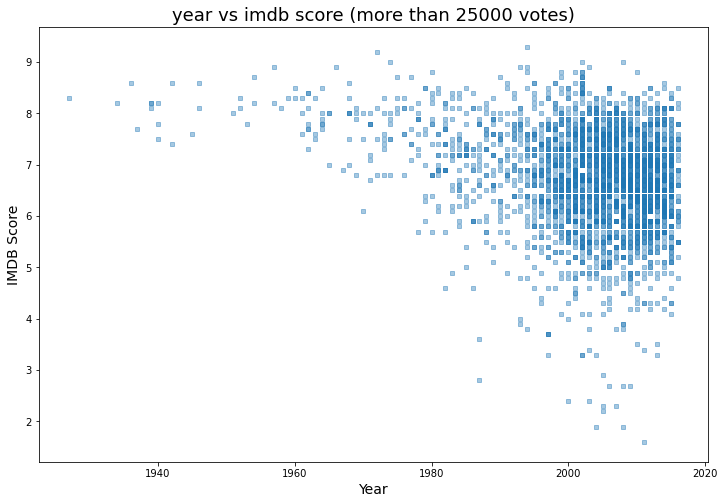

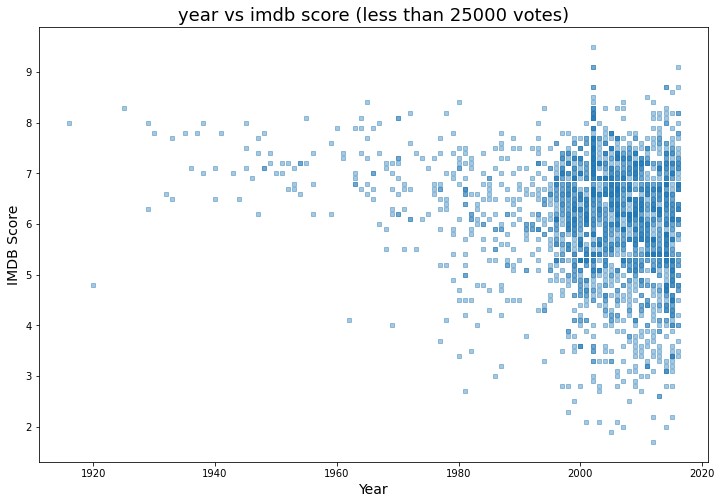

In [90]:
major_movies = df5[df5["num_voted_users"] >= 25000]
major_movies.plot.scatter("title_year", "imdb_score", figsize=(12, 8), marker = 's', alpha=0.4)
plt.title("year vs imdb score (more than 25000 votes)", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("IMDB Score", fontsize=14)
plt.show()

major_movies = df5[df5["num_voted_users"] < 25000]
major_movies.plot.scatter("title_year", "imdb_score", figsize=(12, 8), marker = 's', alpha=0.4)
plt.title("year vs imdb score (less than 25000 votes)", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("IMDB Score", fontsize=14)
plt.show()

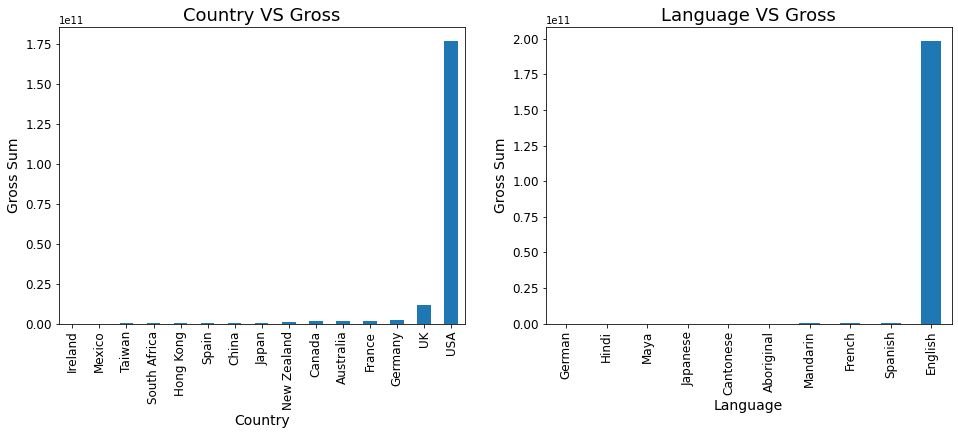

In [13]:
fig, ax = plt.subplots(figsize=(16,12))

plt.subplot(2, 2, 1)
df5.groupby(by="country")["gross"].sum().sort_values()[50:66].plot(kind="bar", fontsize=12)
plt.title("Country VS Gross", fontsize = 18)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Gross Sum", fontsize = 14)

plt.subplot(2, 2, 2)
df5.groupby(by="language")["gross"].sum().sort_values()[37:47].plot(kind="bar", fontsize=12)
plt.title("Language VS Gross", fontsize = 18)
plt.xlabel("Language", fontsize = 14)
plt.ylabel("Gross Sum", fontsize = 14)
plt.show()

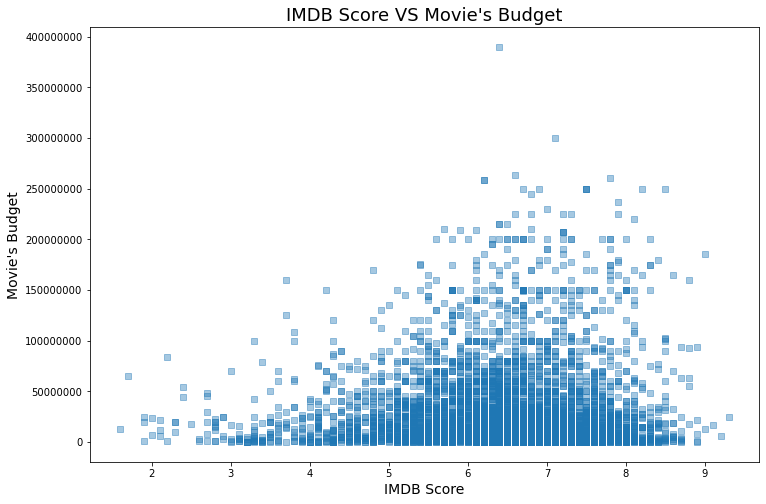

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x=df5["imdb_score"], y=df5["budget"], marker = 's', alpha=0.4)
plt.ticklabel_format(style="plain")
plt.title("IMDB Score VS Movie's Budget", fontsize = 18)
plt.xlabel("IMDB Score", fontsize = 14)
plt.ylabel("Movie's Budget", fontsize = 14)
plt.show()

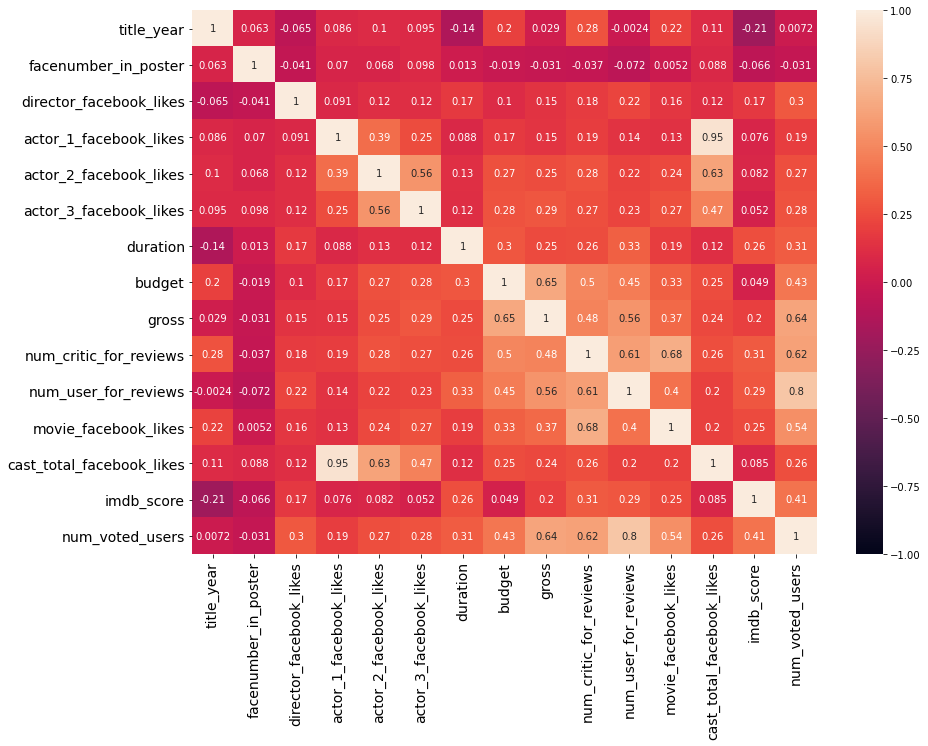

In [91]:
partial_1 = df5[["title_year", "facenumber_in_poster", "director_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes",
          "actor_3_facebook_likes", "duration", "budget", "gross", "num_critic_for_reviews", "num_user_for_reviews",
          "movie_facebook_likes", "cast_total_facebook_likes", "imdb_score", "num_voted_users"]]

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(heatmap.corr(), ax=ax, annot=True, vmin=-1, vmax=1, cbar=True);
ax.tick_params(axis="both", labelsize=14)

In [92]:
partial_1 = df5
i = 0
for lang in partial_1["language"]:
    if(lang == "English"):
        partial_1.at[i, "language_num"] = 1
    else:
        partial_1.at[i, "language_num"] = 0
    i += 1

i = 0    
for cntr in partial_1["country"]:
    if(cntr == "USA"):
        partial_1.at[i, "country_num"] = 1
    else:
        partial_1.at[i, "country_num"] = 0
    i += 1

i = 0
for clr in partial_1["color"]:
    if(clr == "Color"):
        partial_1.at[i, "color_num"] = 1
    else:
        partial_1.at[i, "color_num"] = 0
    i += 1

i = 0
for g in df5["genres"]:
    splitted = g.split("|", )
    for s in splitted:
        partial_1.at[i, s] = 1
    i += 1
    
partial_1.update(partial_1[["Action","Adventure","Fantasy", "Sci-Fi", "Thriller", "Documentary", "Romance", "Animation", "Comedy", "Family", "Musical", "Mystery", "Western", "Drama", "History", "Sport", "Crime", "Horror", "War", "Biography", "Music", "Game-Show", "Reality-TV", "News", "Short", "Film-Noir"]].fillna(0))

In [93]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(partial_1.describe(include="all"))
    
    
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(partial_1.sample(20))

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,duration,genres,plot_keywords,budget,gross,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link,language_num,country_num,color_num,Action,Adventure,Fantasy,Sci-Fi,Thriller,Documentary,Romance,Animation,Comedy,Family,Musical,Mystery,Western,Drama,History,Sport,Crime,Horror,War,Biography,Music,Game-Show,Reality-TV,News,Short,Film-Noir
count,5043,5043,5043.00000,5043.000000,5043.000000,5043,5043.000000,5043,5043.000000,5043,5043.000000,5028.000000,5043,5043,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5043,5043,5043,4714.000000,4740,5043,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
unique,4917,2399,NaN,NaN,NaN,2098,NaN,3033,NaN,3522,NaN,NaN,914,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,66,2,NaN,18,4919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Pan,None,NaN,NaN,NaN,Robert De Niro,NaN,Morgan Freeman,NaN,None,NaN,NaN,Drama,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,USA,Color,NaN,R,http://www.imdb.com/title/tt1976009/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,104,NaN,NaN,NaN,49,NaN,20,NaN,23,NaN,NaN,236,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4714,3810,4834,NaN,2118,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.46044,1.375967,672.351576,NaN,6550.941305,NaN,1647.496530,NaN,642.068015,107.201074,NaN,NaN,3.331943e+07,3.997226e+07,138.804283,271.634940,7525.964505,9699.063851,6.442138,8.366816e+04,NaN,NaN,NaN,2.220403,NaN,NaN,0.934761,0.755503,0.958556,0.228634,0.183026,0.120960,0.122150,0.279794,0.023994,0.219512,0.047987,0.371208,0.108269,0.026175,0.099147,0.019235,0.514376,0.041047,0.036090,0.176284,0.112036,0.042237,0.058100,0.042435,0.000198,0.000397,0.000595,0.000991,0.001190
std,NaN,NaN,12.34046,2.017534,2785.871819,NaN,15012.315824,NaN,4038.092967,NaN,1661.808199,25.197441,NaN,NaN,3.942368e+07,6.483779e+07,121.792053,377.603767,19320.445110,18163.799124,1.125116,1.384853e+05,NaN,NaN,NaN,1.385113,NaN,NaN,0.246971,0.429831,0.199334,0.419994,0.386726,0.326113,0.327491,0.448942,0.153044,0.413957,0.213761,0.483176,0.310751,0.159671,0.298889,0.137362,0.499843,0.198419,0.186532,0.381099,0.315443,0.201149,0.233956,0.201600,0.014082,0.019913,0.024385,0.031475,0.034476
min,NaN,NaN,1916.00000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,7.000000,NaN,NaN,2.180000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.600000,5.000000e+00,NaN,NaN,NaN,1.180000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1999.00000,0.000000,6.000000,NaN,611.000000,NaN,278.500000,NaN,130.000000,93.000000,NaN,NaN,7.000000e+06,3.037815e+05,48.000000,64.000000,0.000000,1411.000000,5.800000,8.593500e+03,NaN,NaN,NaN,1.850000,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,200

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,duration,genres,plot_keywords,budget,gross,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link,language_num,country_num,color_num,Action,Adventure,Fantasy,Sci-Fi,Thriller,Documentary,Romance,Animation,Comedy,Family,Musical,Mystery,Western,Drama,History,Sport,Crime,Horror,War,Biography,Music,Game-Show,Reality-TV,News,Short,Film-Noir
2865,Woo,Daisy von Scherler Mayer,1998,0,18.0,LL Cool J,1000.0,Jada Pinkett Smith,851.0,Dave Chappelle,744.0,84.0,Comedy|Romance,blind date|law clerk|love|manhattan new york c...,13000000,8026971.0,23.0,20.0,204,3352.0,3.8,1520,English,USA,Color,NaN,R,http://www.imdb.com/title/tt0120531/?ref_=fn_t...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4317,Vampire Killers,Phil Claydon,2009,3,6.0,MyAnna Buring,513.0,James Corden,480.0,Silvia Colloca,161.0,88.0,Action|Comedy|Fantasy|Horror,blood|breasts|female nudity|lesbian|vampire,33319431,0.0,107.0,91.0,0,1593.0,5.2,17296,English,UK,Color,2.35,R,http://www.imdb.com/title/tt1020885/?ref_=fn_t...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237,The Living Daylights,John Glen,1987,1,46.0,Joe Don Baker,387.0,Desmond Llewelyn,244.0,Art Malik,162.0,130.0,Action|Adventure|Thriller,british agent|defection|escape|kgb|soviet general,30000000,51185897.0,105.0,271.0,0,1233.0,6.7,69457,English,UK,Color,2.35,PG,http://www.imdb.com/title/tt0093428/?ref_=fn_t...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2036,Muppets from Space,Tim Hill,1999,0,25.0,Josh Charles,1000.0,F. Murray Abraham,670.0,David Arquette,611.0,87.0,Adventure|Comedy|Family|Fantasy|Music|Sci-Fi,alien|breakfast|escape|rat|ufo,24000000,16290976.0,70.0,100.0,619,3243.0,6.2,14637,English,USA,Color,1.85,G,http://www.imdb.com/title/tt0158811/?ref_=fn_t...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1782,Winged Migration,Jacques Perrin,2001,0,63.0,Jacques Perrin,63.0,Philippe Labro,3.0,None,0.0,81.0,Documentary,arctic|bad weather|flight|migration|ocean,160000000,10762178.0,100.0,153.0,1000,66.0,8.0,10369,English,France,Color,1.85,G,http://www.imdb.com/title/tt0301727/?ref_=fn_t...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3711,"20,000 Leagues Under the Sea",Richard Fleischer,1954,0,130.0,James Mason,617.0,Robert J. Wilke,53.0,Paul Lukas,51.0,127.0,Adventure|Drama|Family|Fantasy|Sci-Fi,captain|expedition|sea|submarine|whale,5000000,0.0,69.0,108.0,0,799.0,7.2,22123,English,USA,Color,1.37,Approved,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3180,Deuces Wild,Scott Kalvert,2002,1,9.0,Norman Reedus,12000.0,James Franco,11000.0,Frankie Muniz,934.0,96.0,Action|Crime|Drama,1950s|drug overdose|gang|gang war|new york city,10000000,6044618.0,38.0,92.0,398,26961.0,5.6,6200,English,USA,Color,2.35,R,http://www.imdb.com/title/tt0231448/?ref_=fn_t...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2159,Wayne's World,Penelope Spheeris,1992,2,122.0,Tia Carrere,1000.0,Lara Flynn Boyle,619.0,Kurt Fuller,617.0,94.0,Comedy|Music,basement|lead actor's first film|long hair|pub...,20000000,121697350.0,61.0,176.0,0,4263.0,7.0,114610,English,USA,Color,1.85,PG-13,http://www.imdb.com/title/tt0105793/?ref_=fn_t...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [94]:
partial_2 = partial_1[["title_year", "facenumber_in_poster", "director_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes",
          "actor_3_facebook_likes", "duration", "budget", "gross", "num_critic_for_reviews", "num_user_for_reviews",
          "movie_facebook_likes", "cast_total_facebook_likes", "imdb_score", "num_voted_users", "language_num", "country_num",
          "color_num", "Action", "Adventure", "Fantasy", "Sci-Fi", "Thriller", "Documentary", "Romance", "Animation","Comedy",
          "Family", "Musical", "Mystery", "Western", "Drama", "History", "Sport", "Crime", "Horror", "War", "Biography",
          "Music", "Game-Show", "Reality-TV", "News", "Short", "Film-Noir"]]

with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(partial_2.describe())

,title_year,facenumber_in_poster,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,duration,budget,gross,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language_num,country_num,color_num,Action,Adventure,Fantasy,Sci-Fi,Thriller,Documentary,Romance,Animation,Comedy,Family,Musical,Mystery,Western,Drama,History,Sport,Crime,Horror,War,Biography,Music,Game-Show,Reality-TV,News,Short,Film-Noir
count,5043.00000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5028.000000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,2002.46044,1.375967,672.351576,6550.941305,1647.496530,642.068015,107.201074,3.331943e+07,3.997226e+07,138.804283,271.634940,7525.964505,9699.063851,6.442138,8.366816e+04,0.934761,0.755503,0.958556,0.228634,0.183026,0.120960,0.122150,0.279794,0.023994,0.219512,0.047987,0.371208,0.108269,0.026175,0.099147,0.019235,0.514376,0.041047,0.036090,0.176284,0.112036,0.042237,0.058100,0.042435,0.000198,0.000397,0.000595,0.000991,0.001190
std,12.34046,2.017534,2785.871819,15012.315824,4038.092967,1661.808199,25.197441,3.942368e+07,6.483779e+07,121.792053,377.603767,19320.445110,18163.799124,1.125116,1.384853e+05,0.246971,0.429831,0.199334,0.419994,0.386726,0.326113,0.327491,0.448942,0.153044,0.413957,0.213761,0.483176,0.310751,0.159671,0.298889,0.137362,0.499843,0.198419,0.186532,0.381099,0.315443,0.201149,0.233956,0.201600,0.014082,0.019913,0.024385,0.031475,0.034476
min,1916.00000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.180000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.600000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.00000,0.000000,6.000000,611.000000,278.500000,130.000000,93.000000,7.000000e+06,3.037815e+05,48.000000,64.000000,0.000000,1411.000000,5.800000,8.593500e+03,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.00000,1.000000,45.000000,986.000000,595.000000,367.000000,103.000000,2.300000e+07,1.527968e+07,109.000000,155.000000,166.000000,3090.000000,6.600000,3.435900e+04,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.00000,2.000000,189.000000,11000.000000,918.000000,635.000000,118.000000,4.000000e+07,5.135707e+07,194.000000,324.000000,3000.000000,13756.500000,7.200000,9.630900e+04,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.00000,43.000000,23000.000000,640000.000000,137000.000000,23000.000000,511.000000,3.900000e+08,7.605058e+08,813.000000,5060.000000,349000.000000,656730.000000,9.500000,1.689764e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

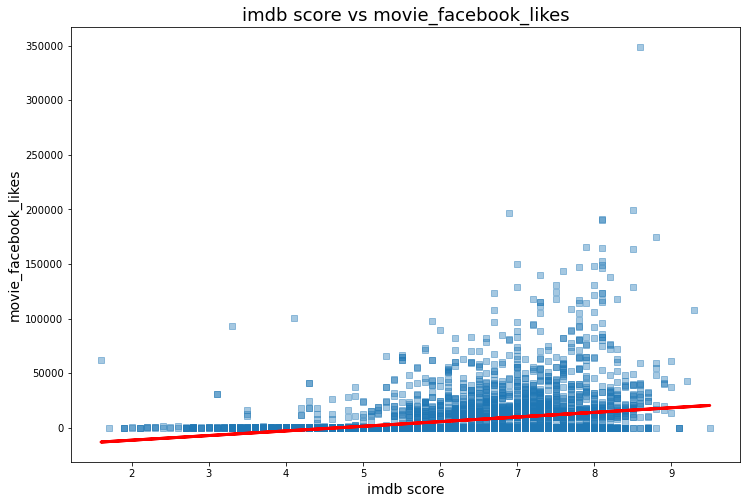

In [56]:
pred1 = sm.ols(formula="movie_facebook_likes ~ imdb_score", data=partial_2).fit()

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x=partial_2["imdb_score"], y=partial_2["movie_facebook_likes"], marker='s', alpha=0.4)
plt.plot(partial_2["imdb_score"], pred1.predict(), c="r", linewidth=3)
plt.ticklabel_format(style="plain")
plt.title("imdb score vs movie_facebook_likes", fontsize=18)
plt.xlabel("imdb score", fontsize=14)
plt.ylabel("movie_facebook_likes", fontsize=14)
plt.show()

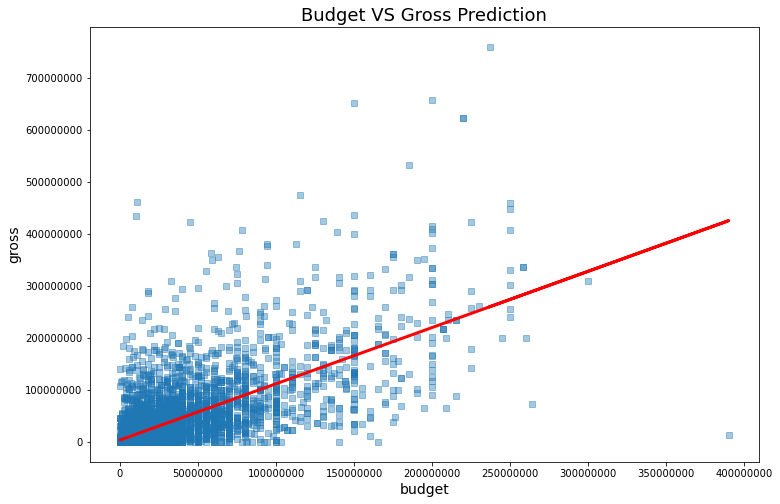

In [95]:
pred2 = sm.ols(formula="gross ~ budget", data=partial_2).fit()

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x=partial_2["budget"], y=partial_2["gross"], marker='s', alpha=0.4)
plt.plot(partial_2["budget"], pred2.predict(), c="r", linewidth=3)
plt.ticklabel_format(style="plain")
plt.title("Budget VS Gross Prediction", fontsize=18)
plt.xlabel("budget", fontsize=14)
plt.ylabel("gross", fontsize=14)
plt.show()

In [96]:
partial_3 = partial_1[["title_year", "facenumber_in_poster", "director_facebook_likes", "actor_1_facebook_likes",
           "budget", "gross", "movie_facebook_likes", "language_num", "country_num", "color_num"]]
partial_3

,title_year,facenumber_in_poster,director_facebook_likes,actor_1_facebook_likes,budget,gross,movie_facebook_likes,language_num,country_num,color_num
0,2009,0,0.0,1000.0,237000000,760505847.0,33000,1.0,1.0,1.0
1,2007,0,563.0,40000.0,300000000,309404152.0,0,1.0,1.0,1.0
2,2015,1,0.0,11000.0,245000000,200074175.0,85000,1.0,0.0,1.0
3,2012,0,22000.0,27000.0,250000000,448130642.0,164000,1.0,1.0,1.0
4,2002,0,131.0,131.0,33319431,0.0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5038,2013,2,2.0,637.0,33319431,0.0,84,1.0,0.0,1.0
5039,2002,1,0.0,841.0,33319431,0.0,32000,1.0,1.0,1.0
5040,2013,0,0.0,0.0,1400,0.0,16,1.0,1.0,1.0
5041,2012,5,0.0,946.0,33319431,10443.0,660,1.0,1.0,1.0


In [97]:
y = np.array(partial_2["imdb_score"], dtype=int)
print("Minimum value:", np.min(y))
print("Median value:", np.median(y))
print("Maximum value:", np.max(y))

x = np.array(partial_3.values, dtype=int)

Minimum value: 1
Median value: 6.0
Maximum value: 9


Accuracy with k=3 is: 0.29137760158572845
knn (k=1) Accuracy: 0.3012884043607532, train accuracy: 0.9995042141794744
knn (k=3) Accuracy: 0.29137760158572845, train accuracy: 0.5986613782845811
knn (k=5) Accuracy: 0.3330029732408325, train accuracy: 0.5250371839365394
knn (k=7) Accuracy: 0.33002973240832506, train accuracy: 0.49058006941001486
knn (k=9) Accuracy: 0.3478691774033697, train accuracy: 0.473475458601884
knn (k=11) Accuracy: 0.3409316154608523, train accuracy: 0.4598413485374318
knn (k=13) Accuracy: 0.3458870168483647, train accuracy: 0.4526524541398116
knn (k=15) Accuracy: 0.34886025768087214, train accuracy: 0.4524045612295488
knn (k=17) Accuracy: 0.34489593657086226, train accuracy: 0.4402578086266733
knn (k=19) Accuracy: 0.3419226957383548, train accuracy: 0.428854734754586


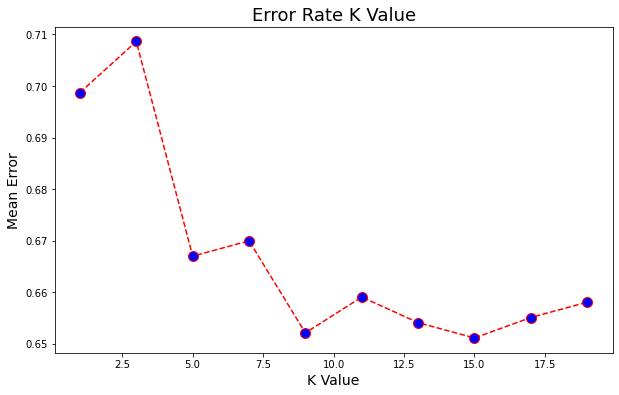

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

print("Accuracy with k=3 is:", knn.score(x_test, y_test))

for k in range(1, 20, 2):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(x_train, y_train)
    acc = knn2.score(x_test, y_test)
    acc_tr = knn2.score(x_train, y_train)
    print("knn (k={}) Accuracy: {}, train accuracy: {}".format(k, acc, acc_tr))

error = []

for k in range(1, 20, 2):
    knn3 = KNeighborsClassifier(n_neighbors=k)
    knn3.fit(x_train, y_train)
    pred_k = knn3.predict(x_test)
    error.append(np.mean(pred_k != y_test))

plt.figure(figsize=(10,6))
plt.title("Error Rate K Value", fontsize=18)  
plt.xlabel("K Value", fontsize=14)  
plt.ylabel("Mean Error", fontsize=14)
plt.plot(range(1, 20, 2), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10);

(5043, 10)


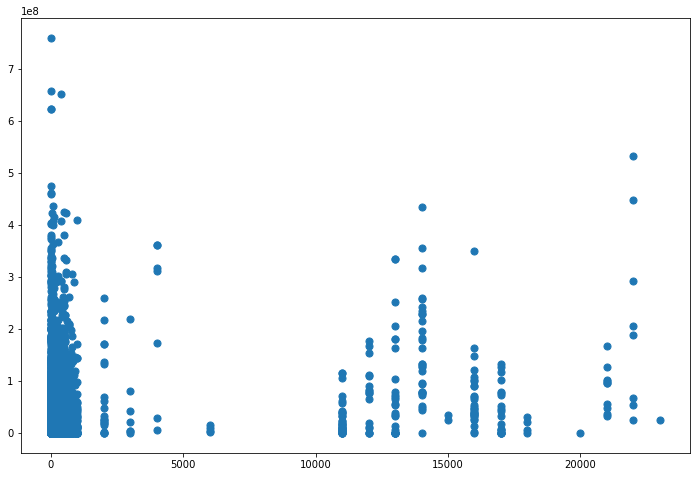

In [101]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

x = partial_3.values

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

y_pred = KMeans(n_clusters=2, n_init=1, max_iter=600).fit_predict(x_scale)

plt.figure(figsize=(12, 8))
plt.scatter(x[:, 2], x[:, 5], marker="o");

print(x.shape)

In [102]:
partial_3 = partial_3.copy()
partial_3["predicted"] = y_pred

For n_clusters = 2 The silhouette_score is : 0.714874039289376


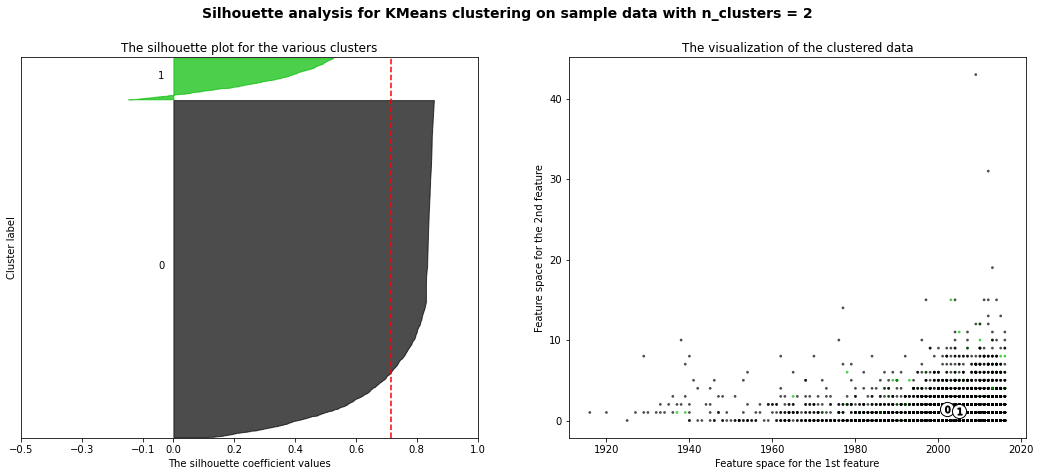

For n_clusters = 3 The silhouette_score is : 0.5938447552891669


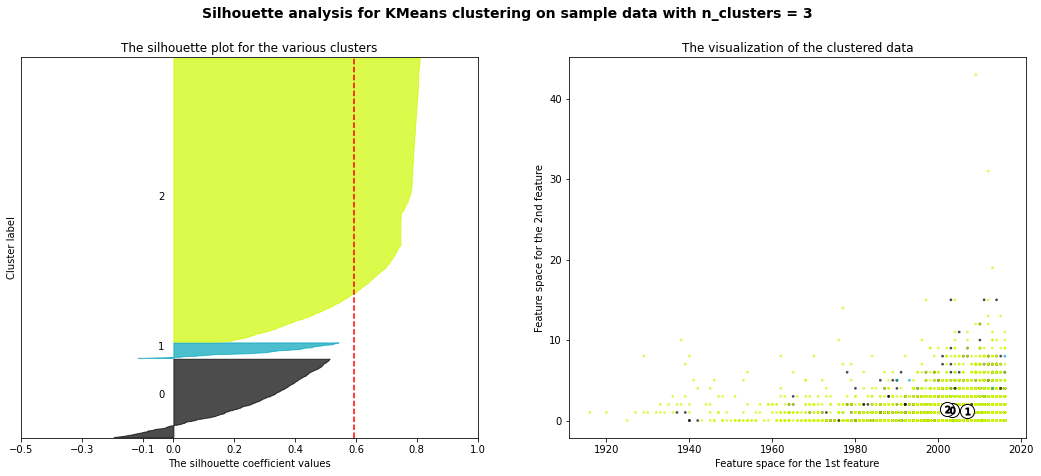

For n_clusters = 4 The silhouette_score is : 0.5228247362429517


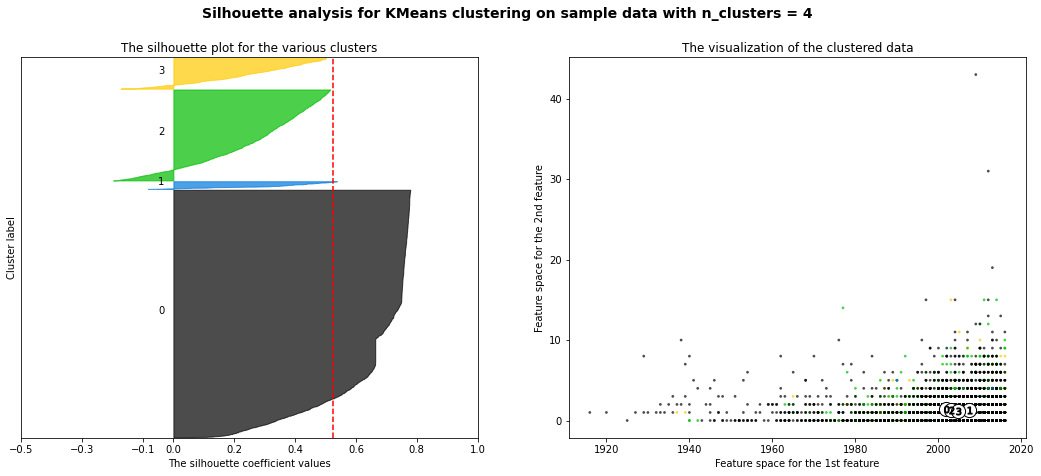

For n_clusters = 5 The silhouette_score is : 0.5034414692157888


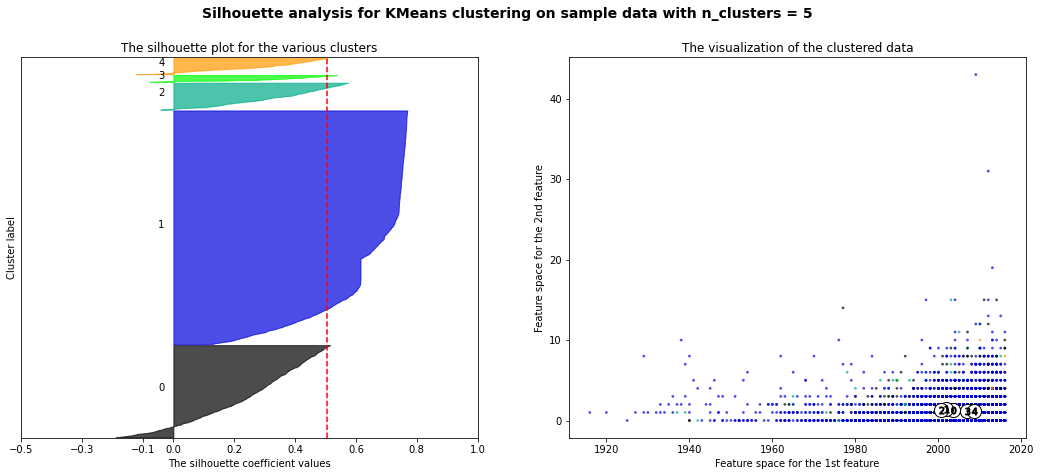

In [111]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.3, 1])
    
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values =\
        sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color,
                          edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.5, -0.3, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters), fontsize=14, fontweight="bold")
    plt.show()

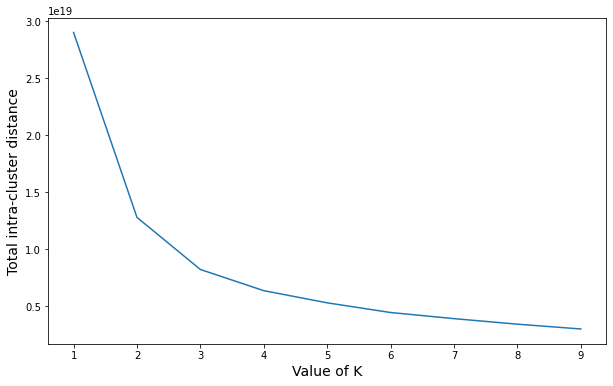

In [107]:
ks = range(1, 10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X)
    scores.append(-model.score(X))

plt.figure(figsize=(10, 6))
plt.plot(ks, scores)
plt.ylabel("Total intra-cluster distance", fontsize=14)
plt.xlabel("Value of K", fontsize=14)
plt.show()

In [112]:
print("Cluster #1: ")
display(partial_3[partial_3["predicted"] == 0].sample(10))
print("Cluster #2: ")
display(partial_3[partial_3["predicted"] == 1].sample(10))

Cluster #1: 


,title_year,facenumber_in_poster,director_facebook_likes,actor_1_facebook_likes,budget,gross,movie_facebook_likes,language_num,country_num,color_num,predicted
3044,1992,0,0.0,636.0,12000000,21370057.0,541,1.0,1.0,1.0,0
667,2000,1,226.0,13000.0,60000000,69688384.0,0,1.0,1.0,1.0,0
2082,1998,1,101.0,931.0,23000000,176483808.0,0,1.0,1.0,1.0,0
3745,1986,0,17.0,690.0,5000000,12947763.0,0,1.0,1.0,1.0,0
388,2002,1,0.0,14000.0,100000000,35168677.0,0,1.0,0.0,1.0,0
1529,2012,0,35.0,3000.0,33000000,35057332.0,19000,1.0,1.0,1.0,0
2134,2007,0,0.0,22000.0,9000000,8579684.0,0,1.0,1.0,1.0,0
1399,1999,1,116.0,45000.0,33000000,205399422.0,0,1.0,1.0,1.0,0
241,2013,3,16.0,16000.0,135000000,187165546.0,28000,1.0,1.0,1.0,0
410,2009,2,278.0,11000.0,85000000,112703470.0,0,1.0,1.0,1.0,0


Cluster #2: 


,title_year,facenumber_in_poster,director_facebook_likes,actor_1_facebook_likes,budget,gross,movie_facebook_likes,language_num,country_num,color_num,predicted
4291,2005,0,13.0,373.0,2000000,653621.0,592,1.0,1.0,0.0,1
4238,1946,5,355.0,749.0,2100000,23650000.0,0,1.0,1.0,0.0,1
2694,2004,7,34.0,427.0,20000000,13337299.0,1000,1.0,1.0,0.0,1
3912,1961,2,1000.0,862.0,4000000,0.0,0,1.0,1.0,0.0,1
1213,2005,1,436.0,3000.0,40000000,74098862.0,13000,1.0,1.0,0.0,1
1595,2004,0,43.0,989.0,20000000,114324072.0,0,1.0,1.0,0.0,1
3643,2006,0,194.0,103.0,33319431,23807.0,570,1.0,1.0,0.0,1
2425,1980,1,17000.0,22000.0,18000000,45250.0,0,1.0,1.0,0.0,1
2915,2009,0,50.0,968.0,12500000,1089445.0,0,1.0,0.0,0.0,1
1979,1996,2,277.0,25000.0,28000000,11030963.0,0,1.0,0.0,0.0,1


In [113]:
print("Cluster #1: ")
display((partial_3[partial_3["predicted"] == 0]).describe())
print("Cluster #2: ")
display((partial_3[partial_3["predicted"] == 1]).describe())

Cluster #1: 


,title_year,facenumber_in_poster,director_facebook_likes,actor_1_facebook_likes,budget,gross,movie_facebook_likes,language_num,country_num,color_num,predicted
count,4834.000000,4834.000000,4834.000000,4834.000000,4.834000e+03,4.834000e+03,4834.000000,4834.000000,4834.000000,4834.0,4834.0
mean,2003.246173,1.374431,648.069715,6664.432354,3.387921e+07,4.076719e+07,7651.344435,0.936492,0.757344,1.0,0.0
std,10.702425,2.017833,2725.316382,15243.250953,3.973963e+07,6.549006e+07,19555.969976,0.243901,0.428733,0.0,0.0
min,1937.000000,0.000000,0.000000,0.000000,2.180000e+02,0.000000e+00,0.000000,0.000000,0.000000,1.0,0.0
25%,1999.000000,0.000000,6.000000,628.000000,8.000000e+06,3.966312e+05,0.000000,1.000000,1.000000,1.0,0.0
50%,2005.000000,1.000000,44.000000,995.000000,2.400000e+07,1.611698e+07,170.500000,1.000000,1.000000,1.0,0.0
75%,2011.000000,2.000000,187.000000,11000.000000,4.000000e+07,5.229234e+07,3000.000000,1.000000,1.000000,1.0,0.0
max,2016.000000,43.000000,23000.000000,640000.000000,3.900000e+08,7.605058e+08,349000.000000,1.000000,1.000000,1.0,0.0


Cluster #2: 


,title_year,facenumber_in_poster,director_facebook_likes,actor_1_facebook_likes,budget,gross,movie_facebook_likes,language_num,country_num,color_num,predicted
count,209.000000,209.000000,209.000000,209.000000,2.090000e+02,2.090000e+02,209.000000,209.000000,209.000000,209.0,209.0
mean,1984.287081,1.411483,1233.971292,3925.985646,2.037227e+07,2.158625e+07,4626.028708,0.894737,0.712919,0.0,1.0
std,26.150340,2.015102,3901.566850,7541.988881,2.836956e+07,4.352653e+07,12389.731547,0.307629,0.453486,0.0,0.0
min,1916.000000,0.000000,0.000000,0.000000,1.000000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.0,1.0
25%,1962.000000,0.000000,0.000000,359.000000,1.644736e+06,0.000000e+00,0.000000,1.000000,0.000000,0.0,1.0
50%,1998.000000,1.000000,56.000000,748.000000,8.000000e+06,1.227508e+06,60.000000,1.000000,1.000000,0.0,1.0
75%,2004.000000,2.000000,287.000000,2000.000000,3.331943e+07,2.220261e+07,977.000000,1.000000,1.000000,0.0,1.0
max,2015.000000,14.000000,22000.000000,45000.000000,1.500000e+08,3.296912e+08,109000.000000,1.000000,1.000000,0.0,1.0
